In [1]:
import pandas as pd

In [2]:
from dateutil.relativedelta import relativedelta

In [3]:
from datetime import datetime, timedelta

In [4]:
import yfinance as yf

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Collect the data to train the model

In [6]:
today = datetime.today().strftime("%Y-%m-%d")
previous_date = (datetime.today() - relativedelta(years=2)).strftime("%Y-%m-%d")

In [7]:
data = yf.download("eth-usd", start=previous_date, end=today)

[*********************100%***********************]  1 of 1 completed


In [8]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-09,488.877991,490.851990,475.174988,476.682007,476.682007,1533799936
2018-07-10,476.161987,478.317993,433.959991,434.424011,434.424011,1789069952
2018-07-11,434.515015,447.316010,429.506989,446.518005,446.518005,1422470016
2018-07-12,446.502014,446.502014,422.809998,430.074005,430.074005,1495440000
2018-07-13,430.740997,442.363007,430.740997,434.027008,434.027008,1489670016
...,...,...,...,...,...,...
2020-07-05,228.976196,229.856720,224.544495,227.664597,227.664597,5292172428
2020-07-06,227.685013,242.132706,227.029526,241.510223,241.510223,8782917552
2020-07-07,240.972595,242.681854,234.218658,239.075531,239.075531,6441497597


In [9]:
from sklearn.preprocessing import MinMaxScaler


In [10]:
import numpy as np

# Period of time of previous prices to predict the next one.

In [11]:
period = 20

In [12]:
training_set = data[0:-period]
test_set  = data[len(data)-period:]

In [13]:
training_set=training_set.iloc[:,0:1].values

# Scale the values to be in range of (0,1)
### Numerical stability results in better models for LSTM

In [14]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [15]:
X_train = []
y_train = []

In [16]:
# Every X_train contains <period> values for each y_train
for i in range(period, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-period: i, 0])
    y_train.append(training_set_scaled[i, 0]) 

In [17]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

In [19]:
#X_train

In [20]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
692/692 [==============================] - 4s 5ms/step - loss: 0.0231
Epoch 2/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0072
Epoch 3/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0060
Epoch 4/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0056
Epoch 5/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0055
Epoch 6/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0052
Epoch 7/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0048
Epoch 8/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0049
Epoch 9/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0041
Epoch 10/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0040
Epoch 11/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0043
Epoch 12/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0039
Epoch 13/100


692/692 [==============================] - 2s 3ms/step - loss: 9.3908e-04
Epoch 100/100
692/692 [==============================] - 2s 3ms/step - loss: 0.0012


In [21]:
inputs = data

In [22]:
inputs = inputs.iloc[:,0:1].values

In [23]:
inputs = sc.fit_transform(inputs)

In [24]:
X_test = []
y_test = []
for i in range(period, len(inputs)): 
    X_test.append(inputs[i-period: i, 0])
    y_test.append(inputs[i, 0]) 
    #print(len(X_test))


In [25]:
X_test,y_test = np.array(X_test), np.array(y_test)

In [26]:
#len(X_test)

In [27]:
X_test = np.reshape(X_test, newshape = (X_test.shape[0], X_test.shape[1], 1))

In [28]:
predicted_price = model.predict(X_test)

In [29]:
predicted_price = sc.inverse_transform(predicted_price)

In [30]:
real_price = data['Open'].values

In [31]:
real_price = real_price[20:]

In [32]:
import matplotlib.pyplot as plt

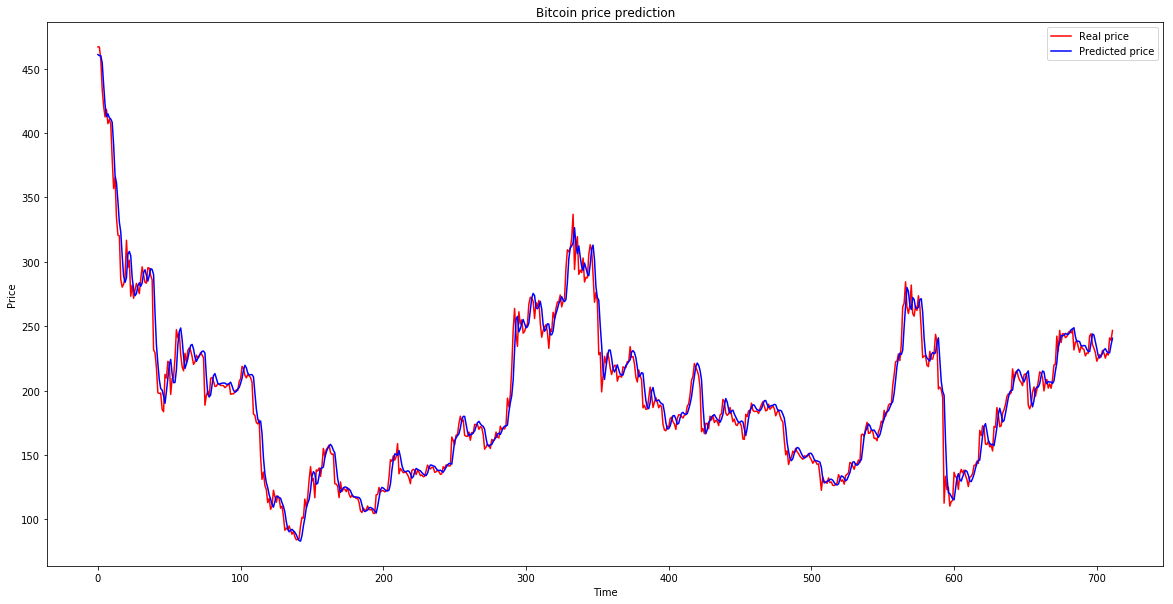

In [33]:
plt.subplots(figsize=(20, 10))
plt.plot(real_price, color = 'red', label = 'Real price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted price')
plt.title('Bitcoin price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.show()

In [34]:
#real_price

In [35]:
loss  = model.evaluate(X_test, y_test,  batch_size=32)
print('Loss:', loss)


712/712 [==============================] - 1s 992us/step
Loss: 0.0006852818489809825


In [ ]:
#X_test[-1]

In [ ]:
#sc.inverse_transform(model.predict(np.array([X_test[-1]])))